In [1]:
import pandas as pd
import os
import csv
from collections import defaultdict
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
with open(os.path.join('data','ListOfCities.csv'), newline='') as f:
    reader = csv.reader(f)
    final_cities = list(reader)

final_cities = [final_cities[i][0] for i in range(56)]





In [3]:
city_data_list = []
for i in range(len(final_cities)):
    data = pd.read_csv(os.path.join("data","{}.csv".format(final_cities[i])), delimiter = ',', header = None)
    data.columns = ['{}'.format(final_cities[i]), 'Value'] 
    data.index +=1
    city_data_list.append(data)
    


In [4]:
faulty_cities = []
for i in range(len(final_cities)):
    data = pd.read_csv(os.path.join("data","{}.csv".format(final_cities[i])), delimiter = ',')
    data.columns = ['{}'.format(final_cities[i]), 'Value'] 
    data.index +=1
    for j in range(1,len(data)):
        data['Value'][j] = data['Value'][j].replace("\xa0₹","")
        data['Value'][j] = data['Value'][j].replace(",","")
        if data['Value'][j] == '?':
            faulty_cities.append(final_cities[i])
            break
    

In [5]:
final_cities = [i for i in final_cities if i not in faulty_cities]
len(final_cities)


46

In [6]:
for city in faulty_cities:
    for i in range(46):
        if(city_data_list[i].columns[0] == city):
            city_data_list.pop(i)
            
        
            

In [7]:
city_data_dict = defaultdict(list)
for i in range(len(final_cities)):
    data = pd.read_csv(os.path.join("data","{}.csv".format(final_cities[i])), delimiter = ',')
    city_name = final_cities[i]
    city_data_dict[city_name].append(data)
    
    

In [8]:
indian_states = ["Andhra Pradesh","Arunachal Pradesh ","Assam","Bihar","Chhattisgarh","Goa","Gujarat","Haryana","Himachal Pradesh","Jammu and Kashmir","Jharkhand","Karnataka","Kerala","Madhya Pradesh","Maharashtra","Manipur","Meghalaya","Mizoram","Nagaland","Odisha","Punjab","Rajasthan","Sikkim","Tamil Nadu","Telangana","Tripura","Uttar Pradesh","Uttarakhand","West Bengal","Andaman and Nicobar Islands","Chandigarh","Dadra and Nagar Haveli","Daman and Diu","Lakshadweep","Delhi","Puducherry"]


In [9]:
from indian_cities.dj_city import cities
from collections import defaultdict

In [10]:
states_cities_dict = defaultdict(list)
cities_list = []
cnt=0
for state in indian_states:
    for i in range(len(cities)):
        if state == cities[i][0]:
            for j in range(len(cities[i][1])):
                city = set([city for city in cities[i][1][j] if city in final_cities])
                if len(city) == 1:
                    cnt+=1
                    c = city.pop()
                    states_cities_dict[state].append(c)
                    cities_list.append(c)


In [11]:
states_cities_dict["Karnataka"].append("Bangalore")
states_cities_dict["West Bengal"].append("Burdwan")
states_cities_dict["Assam"].append("Guwahati")
states_cities_dict["Uttar Pradesh"].append("Lucknow-Lakhnau")
states_cities_dict["Uttar Pradesh"].append("Greater-Noida")
states_cities_dict["Punjab"].append("Mohali-Sahibzada-Ajit-Singh-Nagar")
states_cities_dict["Goa"].append("Goa")
states_cities_dict["Kerala"].append("Ernakulum")
states_cities_dict["Kerala"].append("Kozhikode-Calicut")
states_cities_dict["Maharashtra"].append("Navi-Mumbai")
states_cities_dict["Maharashtra"].append("Thane")
states_cities_dict["Maharashtra"].append("Vasai")


states_cities = states_cities_dict

In [12]:
states = list(states_cities_dict.keys())
states_df = pd.DataFrame(states, columns = ['States']) 
states_df.index += 1

states_df

,States
1,Andhra Pradesh
2,Bihar
3,Chhattisgarh
4,Gujarat
5,Haryana
6,Jammu and Kashmir
7,Karnataka
8,Kerala
9,Madhya Pradesh
10,Maharashtra


In [13]:
state_select = input("Choose the index number for the state in which the city is (data exists for {} states):\n".format(len(states_df.index)))

state = states_df.iloc[int(state_select)-1,0]
 
cities_in_state = pd.DataFrame(states_cities_dict['{}'.format(states_df["States"][int(state_select)])],
                               columns = ['Cities in {}'.format(state)])
cities_in_state.index += 1
cities_in_state


Choose the index number for the state in which the city is (data exists for 23 states):
22


,Cities in Assam
1,Guwahati


In [14]:
city = input("Choose index number of desired city (From 1 to {})\n".format(len(cities_in_state.index)))



Choose index number of desired city (From 1 to 1)
1


In [15]:
def get_non_negative_int(prompt):
    while True:
        try:
            value = int(input(prompt))
        except ValueError:
            print("Sorry, I didn't understand that.")
            continue

        if value < 0:
            print("Sorry, your response must not be negative.")
            continue
        else:
            break
    return value

In [16]:

members = get_non_negative_int("How many members are there in your household?\n")

apartment_location = get_non_negative_int("Where is your apartment? (0 for In City Centre, 1 for Outside City Centre)\n")

apartment_bedroom = get_non_negative_int("1 BHK or 3 BHK? (0 for 1 BHK, 1 for 3 BHK)\n")
if int(apartment_bedroom) == 1:
    apartment_type = get_non_negative_int("What is your apartment type? (0 for on rent, 1 for own, 2 for sharing)\n")
    if int(apartment_type) == 1:
        loan = get_non_negative_int("Type 1 if you have taken a loan\n")
elif int(apartment_bedroom) == 0:
    apartment_type = get_non_negative_int("What is your apartment type? (0 for on rent, 1 for own)\n")
    if int(apartment_type) == 1:
        loan = get_non_negative_int("Type 1 if you have taken a loan: \n")

    
child_kindergarten = get_non_negative_int("How many children go to kindergarten?\n")

child_school = get_non_negative_int("How many children go to school?\n")

child_college = get_non_negative_int("Enter college costs of child (monthly, 0 if no child goes to college): \n")

car = get_non_negative_int("What type of car do you own? (0 for I don't own one, 1 for small family car, 2 for sedan, 3 for SUV))\n")
if int(car) != 0:
    car_drive = get_non_negative_int("How often do you drive your car a day? (Enter approx. number of kilometres)\n")
else:
    car_drive = 0

bike = get_non_negative_int("What type of two-wheeler do you own? (0 for I don't own one, 1 for 75-150 cc, 2 for 150-250 cc, 3 for >300 cc)\n")
if int(bike) != 0:
    bike_drive = get_non_negative_int("How often do you drive your two-wheeler a day? (Enter approx. number of kilometres)\n")
else:
    bike_drive = 0

taxi = get_non_negative_int("How many times a month on average do you take round trips on taxis of an average distance of 10 km?\n")

monthly_pass = get_non_negative_int("Do you pay for monthly transport passes for any members? (1 for Yes, 0 for No)\n")
if int(monthly_pass) == 1:
    monthly_pass_amount = get_non_negative_int("For how many members?\n")
else:
    monthly_pass_amount = 0
    
local_transport = get_non_negative_int("How many times a day do you pay for local transport tickets on demand?\n")

restaurant_times = get_non_negative_int("How many times a month do you eat out?\n")

restaurant_inexpensive = get_non_negative_int("What percent of the times do you prefer inexpensive restaurants? (in %)\n")

going_out = get_non_negative_int("How many times a month would you prefer to go out with your entire family (say, for cinemas)?\n")

drink = get_non_negative_int("Do you drink? (0 for no, 1 for occasional, 2 for moderate, 3 for a lot)\n")

smoke = get_non_negative_int("How many cigarette packs do you smoke a month (household overall)?\n")

gym = get_non_negative_int("Do you have fitness club memberships? (1 for Yes, 0 for No)\n")
if int(gym) == 1:
    gym_number = get_non_negative_int("For how many members?\n")
else:
    gym_number = 0
    
clothing = get_non_negative_int("How often do you buy clothes? (1 for Not Much, 2 for Sometimes, 3 for Often, 4 for A Lot)\n")



How many members are there in your household?
2
Where is your apartment? (0 for In City Centre, 1 for Outside City Centre)
1
1 BHK or 3 BHK? (0 for 1 BHK, 1 for 3 BHK)
1
What is your apartment type? (0 for on rent, 1 for own, 2 for sharing)
0
How many children go to kindergarten?
0
How many children go to school?
0
Enter college costs of child (monthly, 0 if no child goes to college): 
0
What type of car do you own? (0 for I don't own one, 1 for small family car, 2 for sedan, 3 for SUV))
2
How often do you drive your car a day? (Enter approx. number of kilometres)
5
What type of two-wheeler do you own? (0 for I don't own one, 1 for 75-150 cc, 2 for 150-250 cc, 3 for >300 cc)
2
How often do you drive your two-wheeler a day? (Enter approx. number of kilometres)
10
How many times a month on average do you take round trips on taxis of an average distance of 10 km?
0
Do you pay for monthly transport passes for any members? (1 for Yes, 0 for No)
0
How many times a day do you pay for local tr

In [17]:
city = int(city)
req_city = cities_in_state['Cities in {}'.format(state)].iloc[city-1]


In [18]:
for i in range(46):
    if(city_data_list[i].columns[0] == req_city):
        data = city_data_list[i]

In [19]:
for i in range(1,len(data)+1):
    data['Value'][i] = data['Value'][i].replace("\xa0₹","")
    data['Value'][i] = data['Value'][i].replace(",","")


In [20]:
def cost_add(i,div, multiplier):
    global cost
    global final_price
    price = data['Value'][i]
    final_price = (float(price)/float(div))*multiplier
    cost += float(final_price)
    return cost

def gas_cost_add(i,mileage,car_drive):
    global cost
    global gas_price
    price = data['Value'][i]
    gas_price = (float(price)/float(mileage))*float(car_drive)*30
    cost += float(gas_price)
    return cost

def mortgage_add(i, sq_meter):
    global Rent
    L = float(float(data['Value'][i]))*sq_meter
    N = 240.00
    I = float(float(data['Value'][55])/100)
    mortgage = float((L/N) + I*(L/N))
    Rent += float(mortgage)
    return Rent

    


    
    

In [21]:
def Cost_Of_Living_Calculator(data):
    
    global cost, Rent, Education, Vehicle_Costs_and_Gasoline, Transport, Cigarettes, Fitness, Going_Out
    global Clothing, Alcohol, Utilities, Food, Others
    
    
    cost = 0
    Rent = 0
    Education = 0
    Vehicle_Costs_and_Gasoline = 0
    Transport = 0
    Cigarettes = 0
    Fitness = 0
    Going_Out = 0
    Clothing = 0
    Alcohol = 0
    Utilities = 0
    Food = 0
    Others = 0
    
    
    if int(apartment_bedroom) == 1:
        if int(apartment_type) == 0:
            if int(apartment_location) == 0:
                cost_add(50,1,1)
                Rent += final_price
            else:
                cost_add(51,1,1)
                Rent += final_price
        elif int(apartment_type) == 2:
            if int(apartment_location) == 0:
                cost_add(50,3,1)
                Rent += final_price
            else:
                cost_add(51,3,1)
                Rent += final_price
        elif int(apartment_type) == 1 and int(loan) == 1:
            if int(apartment_location) == 0:
                mortgage_add(50,90)
            else:
                mortgage_add(51,90)
    

    elif int(apartment_bedroom) == 0:
        if int(apartment_type) == 0:
            if int(apartment_location) == 0:
                cost_add(48,1,1)
                Rent += final_price
            elif int(apartment_location) == 1:
                cost_add(49,1,1)
                Rent += final_price
        elif int(apartment_type) == 1 and int(loan) ==1:
            if int(apartment_location) == 0:
                mortgage_add(48,45)
    #             Rent += mortgage
            elif int(apartment_location) == 1:
                mortgage_add(49,45)
    #             Rent += Mortgage      

    cost_add(42,1, int(child_kindergarten))
    Education += final_price
    cost_add(43,12, int(child_school))
    Education += final_price
    Education += float(child_college)


    if int(car) == 1:
        gas_cost_add(33,24,car_drive)
        Vehicle_Costs_and_Gasoline += gas_price
    elif int(car) == 2:
        gas_cost_add(33,20,car_drive)
        Vehicle_Costs_and_Gasoline += gas_price
    elif int(car) == 3:
        gas_cost_add(33,15,car_drive)   
        Vehicle_Costs_and_Gasoline += gas_price


    if int(bike) == 1:
        gas_cost_add(33,60,bike_drive)
        Vehicle_Costs_and_Gasoline += gas_price
    elif int(bike) == 2:
        gas_cost_add(33,40,bike_drive)
        Vehicle_Costs_and_Gasoline += gas_price
    elif int(bike) == 3:
        gas_cost_add(33,20,bike_drive)
        Vehicle_Costs_and_Gasoline += gas_price


    cost_add(30,1,int(taxi))
    Transport += final_price
    cost_add(31,1/10,int(taxi))
    Transport += final_price
    cost_add(32,12,int(taxi))
    Transport += final_price
    cost_add(29,1,int(monthly_pass_amount))
    Transport += final_price
    cost_add(28,1,int(local_transport)*30)
    Transport += final_price

    cost_add(27,1,int(smoke))
    Cigarettes += final_price

    cost_add(39,1,int(gym_number))
    Fitness+= final_price



    inexpensive_eating_out = (float(data['Value'][1])*int(members)*int(restaurant_times)*(int(restaurant_inexpensive)/100))
    expensive_eating_out = (float(data['Value'][2])*((int(members)/2))*int(restaurant_times)*(1-(int(restaurant_inexpensive)/100)))
    drinks = (float(data['Value'][7]) + float(data['Value'][8])) * int(members) * int(restaurant_times)
    cost += inexpensive_eating_out
    Going_Out += inexpensive_eating_out
    cost += expensive_eating_out
    Going_Out += expensive_eating_out
    cost += drinks
    Going_Out += drinks

    cinema = (float(data['Value'][41]) + float(data['Value'][7]) + float(data['Value'][8]) + float(data['Value'][1])) * int(members) * int(going_out)
    cost += cinema
    Going_Out += cinema

    clothes = (float(data['Value'][44]) + float(data['Value'][45]) + float(data['Value'][46]) + float(data['Value'][47]))*int(clothing)*0.05*int(members)
    cost += clothes
    Clothing += clothes

    if int(drink) == 1:
        cost_add(24,1,int(drink))
        Alcohol += final_price
        cost_add(25,1,int(drink))
        Alcohol += final_price
        cost_add(26,1,int(drink))
        Alcohol += final_price
    elif int(drink) == 2:
        cost_add(24,1,int(drink))
        Alcohol += final_price
        cost_add(25,1,int(drink)+1)
        Alcohol += final_price
        cost_add(26,1,int(drink)+1)
        Alcohol += final_price
    elif int(drink) == 3:
        cost_add(24,1,int(drink))
        Alcohol += final_price
        cost_add(25,1,int(drink)+3)
        Alcohol += final_price
        cost_add(26,1,int(drink)+3)
        Alcohol += final_price


    cost_add(36,1,1)
    Utilities += final_price
    cost_add(37,1,int(members)*20)
    Utilities += final_price
    cost_add(38,1,1)
    Utilities += final_price


    cost_add(9,1,7.5*int(members))
    Food += final_price
    cost_add(10,1,int(members))
    Food += final_price
    cost_add(12,1,0.75*int(members))
    Food += final_price
    cost_add(11,1,2*int(members))
    Food += final_price
    cost_add(13,1,1)
    Food += final_price
    cost_add(14,1,4*int(members))
    Food += final_price
    cost_add(23,1,5*int(members))
    Food += final_price
    groceries = 1000*int(members)
    cost += groceries
    Food += groceries


    extra = 1000*int(members)
    cost += extra
    Others += extra
    




In [22]:
Cost_Of_Living_Calculator(data)

In [23]:
colors = ['plum','lightcyan','deepskyblue','bisque','lightpink','khaki','sandybrown','lightgray','cornflowerblue','lavender','lightcoral','beige']



In [24]:
metro_cities = ['Kozhikode-Calicut', 'Ahmedabad', 'Nagpur', 'Hyderabad', 'Visakhapatnam',  'Kochi', 'Thiruvananthapuram', 'Pune', 'Bangalore']
golden_cities = ['Kolkata','Chennai','Mumbai','Delhi']
req_city_list = [req_city]
golden_cities = [i for i in golden_cities if i not in req_city_list]

In [25]:

golden_cost_list = []
golden_monthly_inc = []
city_cost_list = []
monthly_inc = []
metro_cost_list = []
metro_monthly_inc = []
req_monthly_inc = []
req_cost_list = []



def scatter_data_add(city_list, monthly_inc_list, cost_list):
    for city in city_list:
        for i in range(46):
            if(city_data_list[i].columns[0] == city):
                data = city_data_list[i]
                for j in range(1,len(data)+1):
                    data['Value'][j] = data['Value'][j].replace("\xa0₹","")
                    data['Value'][j] = data['Value'][j].replace(",","")
                Cost_Of_Living_Calculator(data)
                cost_list.append(cost)
                monthly_inc_list.append(data['Value'][54])
                


scatter_data_add(final_cities, monthly_inc, city_cost_list)
scatter_data_add(metro_cities, metro_monthly_inc, metro_cost_list)
scatter_data_add(golden_cities, golden_monthly_inc, golden_cost_list)
scatter_data_add(req_city_list, req_monthly_inc, req_cost_list)




In [26]:
monthly_inc,city_cost_list = [list(v) for v in zip(*sorted(zip(monthly_inc, city_cost_list)))]
metro_monthly_inc,metro_cost_list = [list(v) for v in zip(*sorted(zip(metro_monthly_inc, metro_cost_list)))]



In [27]:
category_data = {'Categories' : ["Rent", "Education", "Gasoline", "Transport", "Cigarettes", "Fitness",
                               "Going Out", "Clothing", "Alcohol", "Tech Utilities", "Food", "Other Goods and Services"],
                'Costs (in Rs.)' : [Rent, Education, Vehicle_Costs_and_Gasoline, Transport, Cigarettes, Fitness, Going_Out, Clothing,
                           Alcohol, Utilities, Food, Others]}
category_df = pd.DataFrame(category_data)

df_to_plot = category_df.loc[lambda df: df['Costs (in Rs.)'] != 0]
df_to_plot.index += 1
df_to_plot

,Categories,Costs (in Rs.)
1,Rent,15000.00
3,Gasoline,1501.65
5,Cigarettes,3000.00
7,Going Out,8274.40
8,Clothing,3463.71
9,Alcohol,872.83
10,Tech Utilities,2938.83
11,Food,6009.02
12,Other Goods and Services,2000.00


In [33]:
print("TOTAL COST OF LIVING (monthly): ")
print('\033[1m' + 'Rs. {}\n'.format(cost) + '\033[0m')
print("Please note that the estimator " + '\033[1m' + 'does not include insurance, health-related expenses, parking fees or domestic help. It also does not take into calculations income tax.' + '\033[0m')

TOTAL COST OF LIVING (monthly): 
Rs. 43060.44000000001

Please note that the estimator does not include insurance, health-related expenses, parking fees or domestic help. It also does not take into calculations income tax.



## ---------------------------------------VISUALISATION-------------------------------------------------------



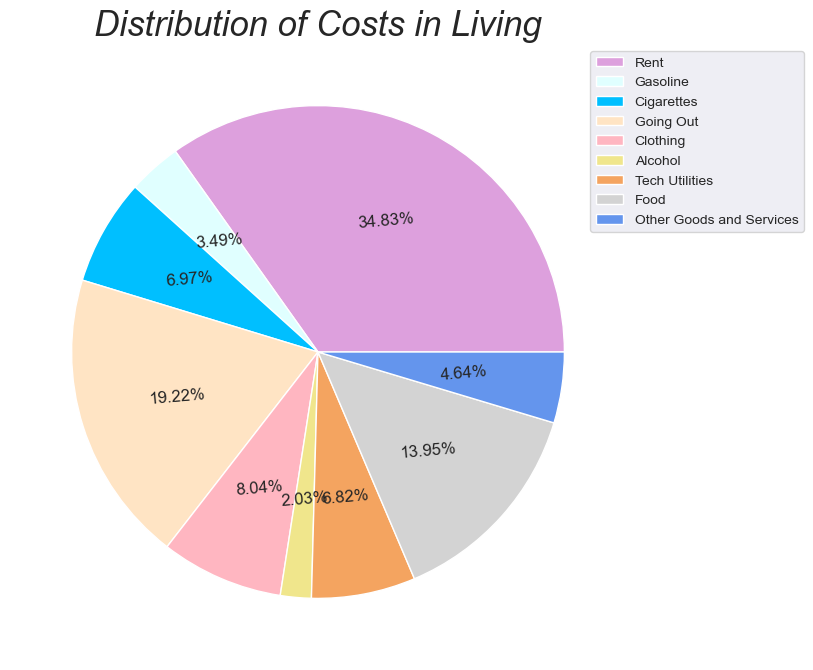

In [29]:
df_to_plot.plot.pie(y='Costs (in Rs.)', figsize = (12,8), colors = colors,
                    labels = df_to_plot['Categories'].values,
                    labeldistance = None,
                    autopct = '%.2f%%',
                    textprops = {'size' : 'medium',
                                'rotation' : '5'})

plt.title("Distribution of Costs in Living", fontsize = 25, fontstyle = 'italic')
plt.axis('off')
plt.legend(loc='upper right', bbox_to_anchor = [1.3,1], fontsize = 10)
plt.show()


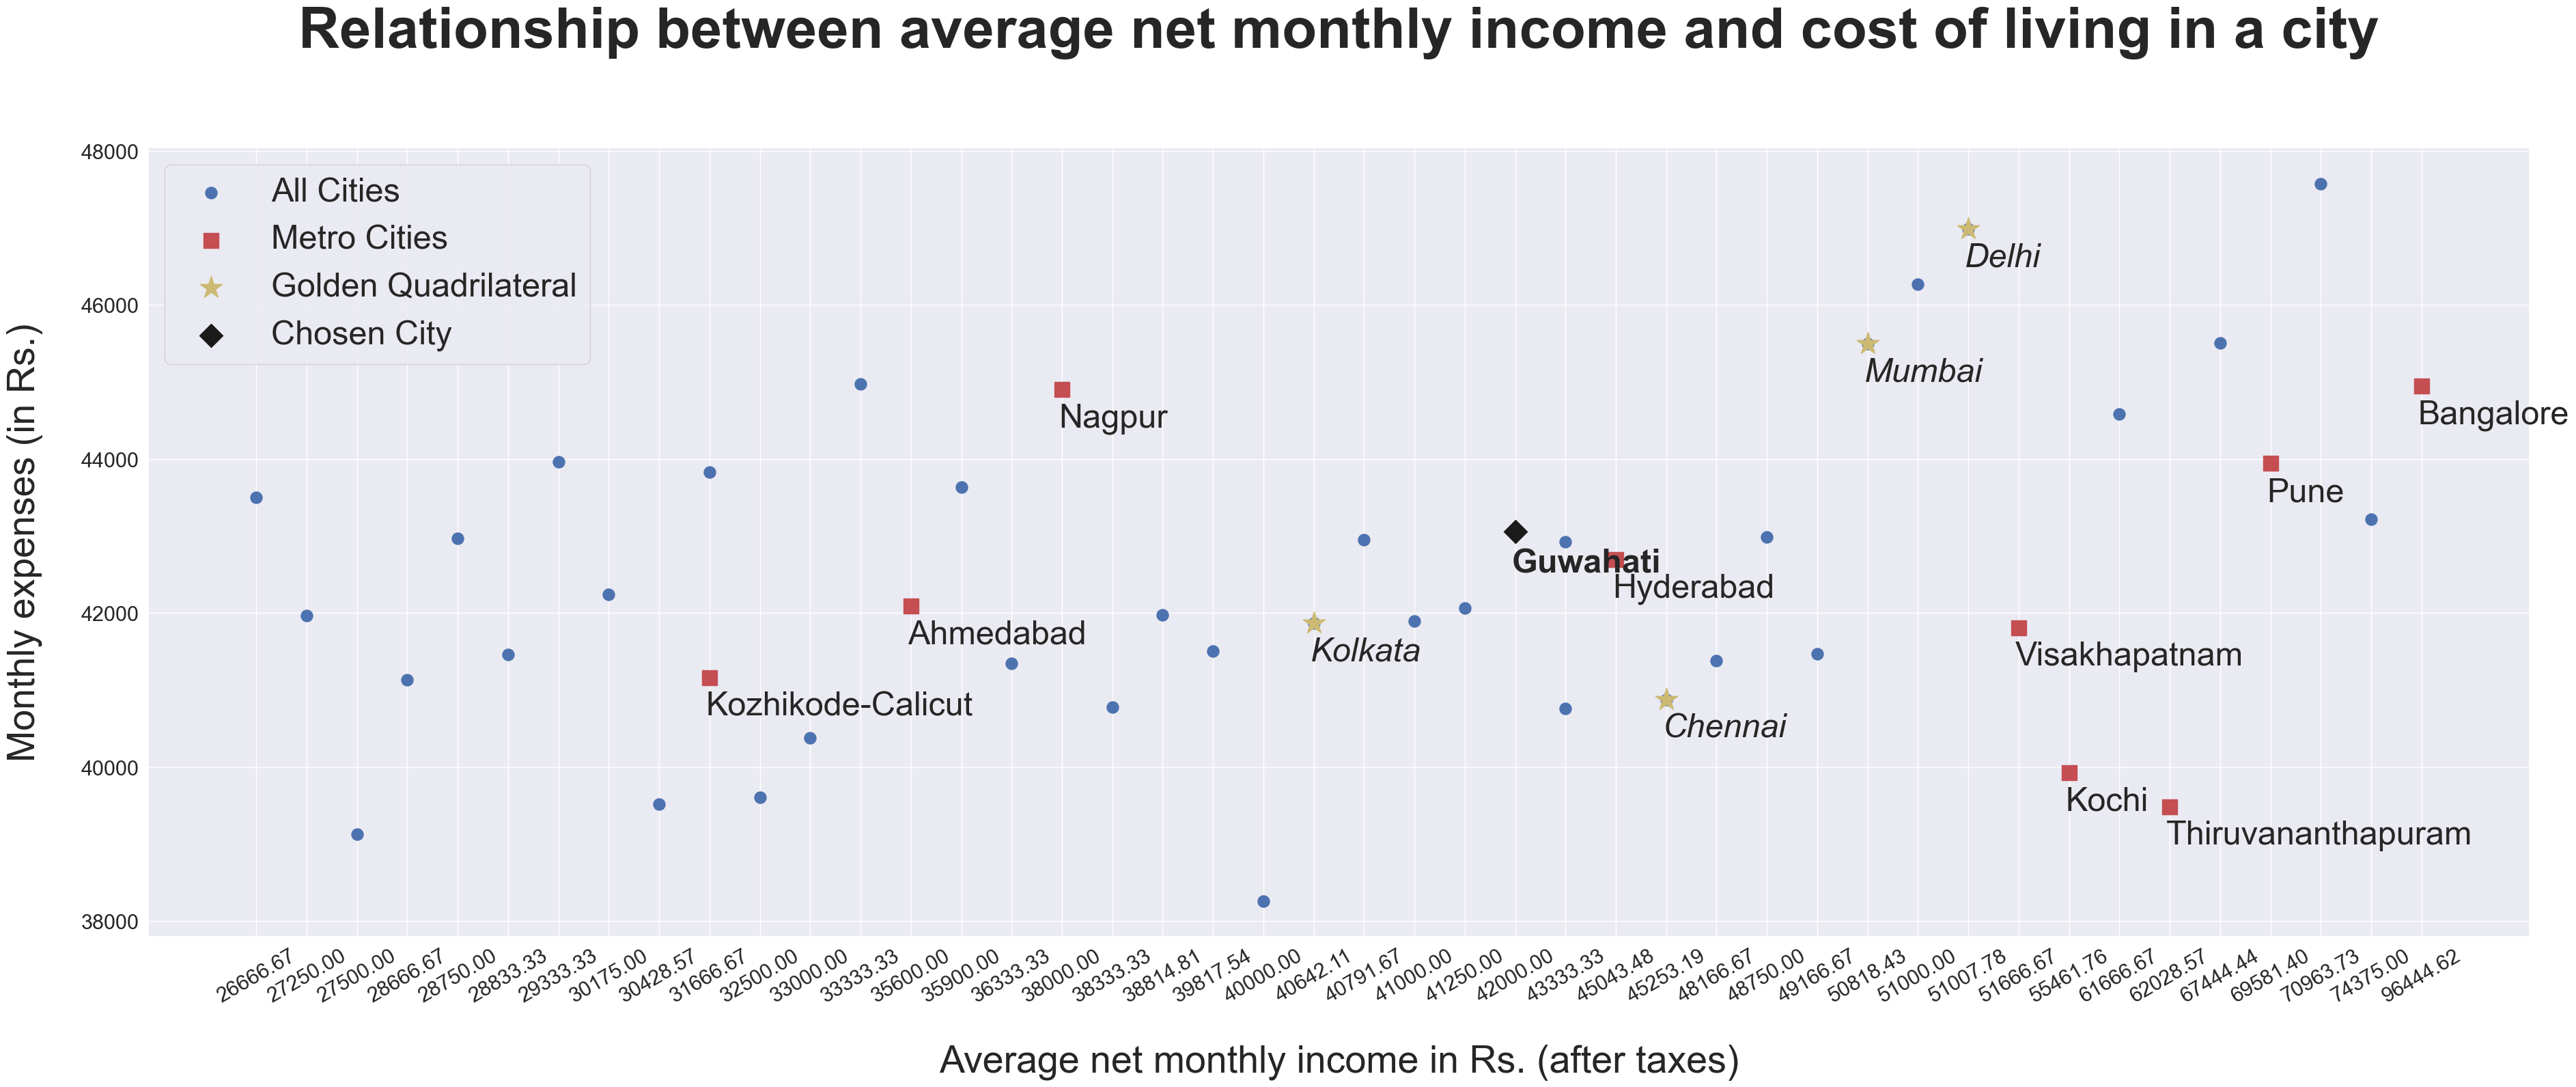

In [30]:
fig = plt.figure(figsize = (45,15))
ax1 = fig.add_subplot(111)

ax1.scatter(monthly_inc,city_cost_list, s=600, c='b', marker=".", label='All Cities')

ax1.scatter(metro_monthly_inc,metro_cost_list, s=250, c='r', marker="s", label='Metro Cities')
for i, city in enumerate(metro_cities):
    plt.annotate(city, (metro_monthly_inc[i], metro_cost_list[i]),
                 xytext=(-5, -55), textcoords="offset pixels", fontsize = 35)

ax1.scatter(golden_monthly_inc,golden_cost_list, s=600, c='y', marker="*", label='Golden Quadrilateral')
for i, city in enumerate(golden_cities):
    plt.annotate(city, (golden_monthly_inc[i], golden_cost_list[i]),
                 xytext=(-5, -55), textcoords="offset pixels", fontsize = 35, style = 'italic')


ax1.scatter(req_monthly_inc,req_cost_list, s=300, c='k', marker="D", label='Chosen City')
plt.annotate(req_city, (req_monthly_inc[0], req_cost_list[0]),
             xytext=(-5, -60), textcoords="offset pixels", fontsize = 35, fontweight = 'bold')

plt.title("Relationship between average net monthly income and cost of living in a city",
         fontsize = 60,
         weight = "bold",
         y=1.12)
plt.xlabel("Average net monthly income in Rs. (after taxes)",
          fontsize = 40,
          y=1,
          labelpad = 40)
plt.ylabel("Monthly expenses (in Rs.)",
          fontsize = 40,
          labelpad = 40)
ax1.tick_params(axis='x', labelsize=22, rotation = 30)
ax1.tick_params(axis='y', labelsize=22)
plt.legend(loc = 'upper left', fontsize = 35)
plt.show()